* cb_2017_us_state_500k.shp
* https://www.census.gov/geo/maps-data/data/cbf/cbf_state.html
* http://jonathansoma.com/lede/foundations-2017/classes/geopandas/mapping-with-geopandas/
  (see section Dataset 1: States)

In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gpd

# read excel file into long format
tuition = (pd 
        .read_excel('data.xlsx')
        .melt('State', var_name = 'date', value_name = 'avg_tuition')
        .assign(date = lambda df: df.date.apply(lambda s: s.split('-')[0]))
        .assign(date = lambda df: pd.to_datetime(df.date))
        .set_index('date', )
        )

/Users/machow/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Why does pandas still add an extra index?
ranked = tuition \
        .groupby('date', as_index = False, ) \
        .apply(lambda df: df.assign(year_rank = df.avg_tuition.rank()))

In [3]:
# plot on map of US
# bonus: bubble with US average
ranked_2015 = ranked.query("date == '2015'")

In [4]:
# plot 2015 avg tuition as barplot
# insert a bar for avg across states
us_map = gpd \
        .read_file("data_map/cb_2017_us_state_500k.shp") \
        .query(
            'STATEFP.astype("int") < 60 & NAME not in ["Hawaii", "Alaska"]',
            engine = "python"
            )

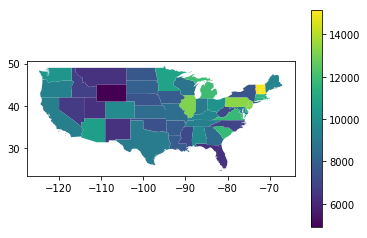

In [5]:
us_map.merge(ranked_2015, left_on = "NAME", right_on = "State") \
      .plot(column="avg_tuition", legend = True)

/Users/machow/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


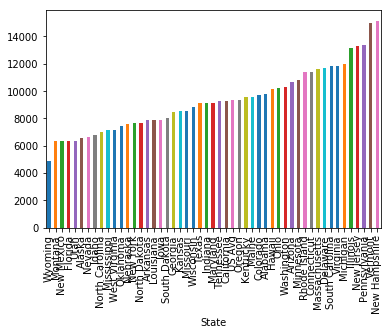

In [6]:
ranked_2015 \
        .reset_index(drop = True) \
        .append(pd.DataFrame({
            'State': ['US Avg'], 
            'avg_tuition': ranked_2015.avg_tuition.mean()
            })) \
        .assign(x_rank = lambda df: df.avg_tuition.rank()) \
        .sort_values("x_rank") \
        .plot(x = "State", y = "avg_tuition", kind = "bar", legend = False)